In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import re

import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('bank-additional-full.csv', sep=';' )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes



    bank client attributes:
        age: age of client (numeric)
        job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
        marital : marital status (categorical: "married", "divorced", "single")
        education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")

    historical bank data
        default: has credit in default? (binary/2-categories: "yes", "no")
        housing: has housing loan? (binary/2-categories: "yes", "no")
        loan: has personal loan? (binary/2-categories: "yes", "no")

    information of the current campaign:
        contact: contact communication type (categorical: "unknown", "telephone", "cellular")
        month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
        duration: last contact duration, in seconds (numeric)

    information of the last campain:
        campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
        previous: number of contacts performed before this campaign and for this client (numeric)
        poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")

    social and economic context attributes
        emp.var.rate: employment variation rate — quarterly indicator (numeric)
        cons.price.idx: consumer price index — monthly indicator (numeric)
        cons.conf.idx: consumer confidence index — monthly indicator (numeric)
        euribor3m: euribor 3 month rate — daily indicator (numeric)
        nr.employed: number of employees — quarterly indicator (numeric

    Output variable (desired target):
        y: has the client subscribed a term deposit? (binary: "yes", "no")


In [42]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [43]:
df.duplicated().sum()

12

In [44]:
df.drop_duplicates(keep='first', inplace= True)
df.shape

(41176, 21)

In [45]:
df.replace(to_replace= 'unknown', value= np.nan, inplace= True)

In [46]:
null_df = df.isnull().sum().sort_values(ascending= False).reset_index()
null_df.columns = ['index', 'Null_num']
null_df['Null_prc'] = null_df['Null_num'] / df.shape[0] * 100
null_df

,index,Null_num,Null_prc
0,default,8596,20.876239
1,education,1730,4.201477
2,housing,990,2.404313
3,loan,990,2.404313
4,job,330,0.801438
5,marital,80,0.194288
6,age,0,0.000000
7,poutcome,0,0.000000
8,nr.employed,0,0.000000
9,euribor3m,0,0.000000


In [47]:
categorical = [x for x in df.columns if df[x].dtypes == 'object']
numerical = [x for x in df.columns if x not in categorical]

In [48]:
print(f"Categorical features {len(categorical)}")
print(f"Numerical features {len(numerical)}")

Categorical features 11
Numerical features 10


<AxesSubplot:xlabel='y', ylabel='count'>

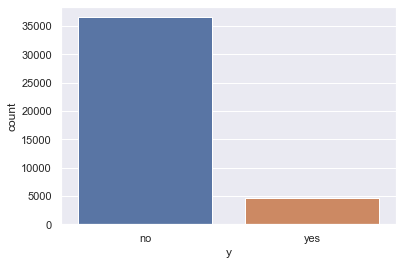

In [49]:
sns.countplot(df['y'])
# imbalance data

In [50]:
def output_encode(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0

df['conversion'] = df['y'].apply(output_encode)
df['conversion'].value_counts()

0    36537
1     4639
Name: conversion, dtype: int64

In [51]:
# bank client attributes:

[Text(0.5, 1.0, 'Subscribed')]

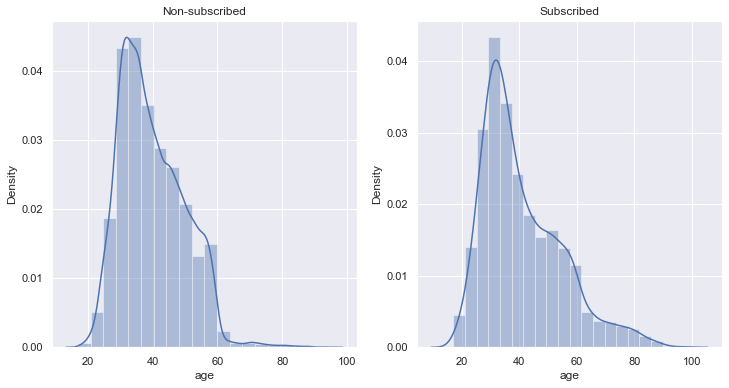

In [52]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.distplot(df[df['conversion'] == 0]['age'], ax= ax[0], bins= 20).set(title = "Non-subscribed")
sns.distplot(df[df['conversion'] == 1]['age'], ax= ax[1], bins= 20).set(title = "Subscribed")
# người già có xu hướng subscribe dịch vụ hơn

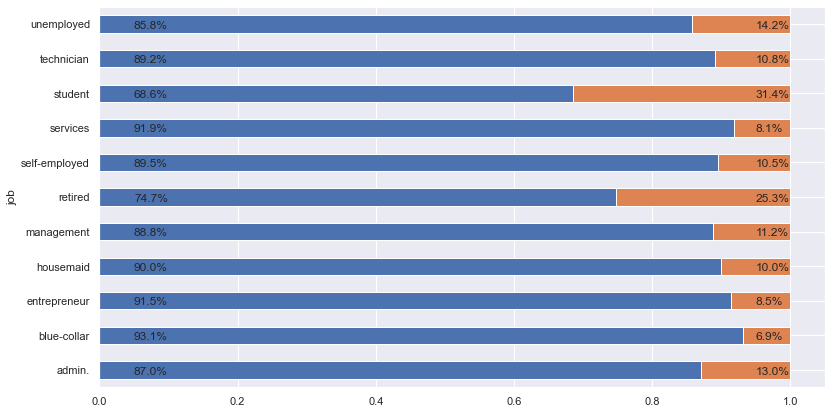

In [53]:
def stacked_hbar_chart(df, feature, target, column):
    pivot_df = pd.pivot_table(df, values=target, index=feature, columns= column, aggfunc=len)
    ax = pivot_df.div(pivot_df.sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=(13,7))
    ax.get_legend().remove()

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if x != 0:
            x = 0.9
        ax.annotate('{:.1%}'.format(width),(x + 0.05, y + 0.13))

stacked_hbar_chart(df, 'job', 'y', 'conversion')

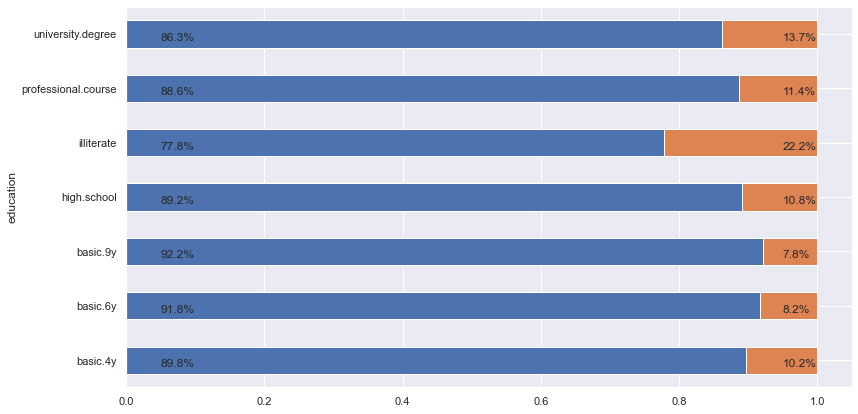

In [80]:
stacked_hbar_chart(df, 'education', 'y', 'conversion')

Text(0.5, 0, '---Job---')

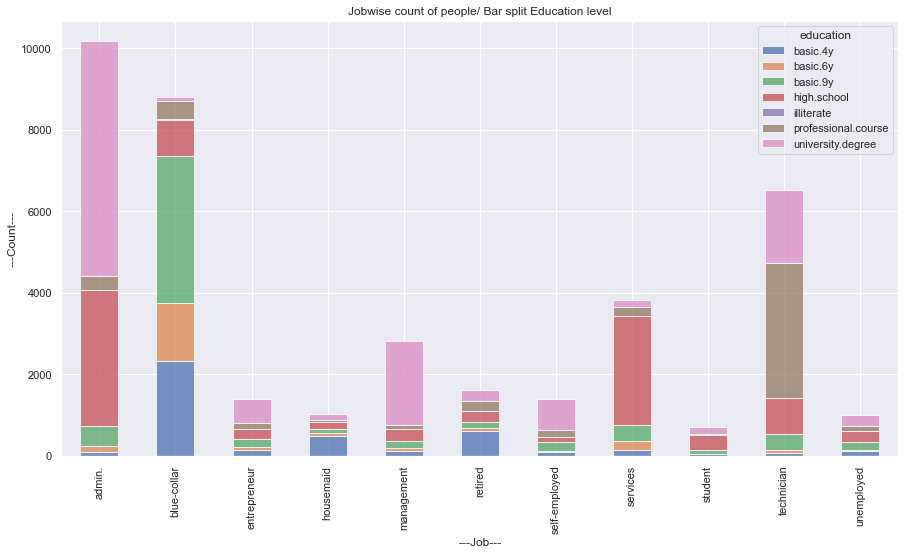

In [54]:
df_pivot = pd.pivot_table(df,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True, figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')

In [55]:
def categories_pie_plot(df, feature, target, column):
    output_df = pd.pivot_table(df, values= target, index= feature, columns= column, aggfunc=len)
    output_df.plot(kind='pie', subplots=True, title=['Non-subscribed', 'Subscribed'], figsize=(18, 7), startangle=90,
                   autopct='%1.1f%%')
    plt.tight_layout()

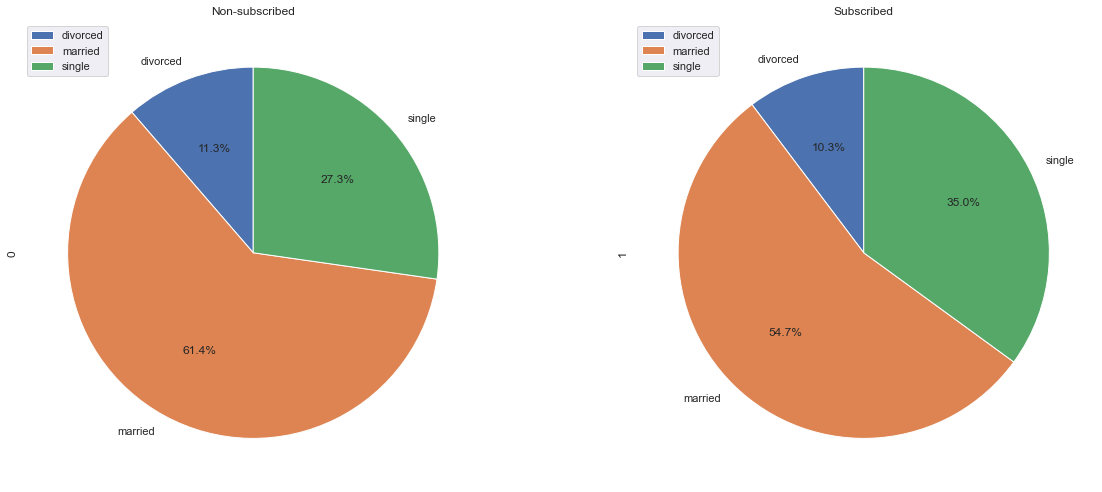

In [56]:
categories_pie_plot(df, 'marital', 'y', 'conversion')

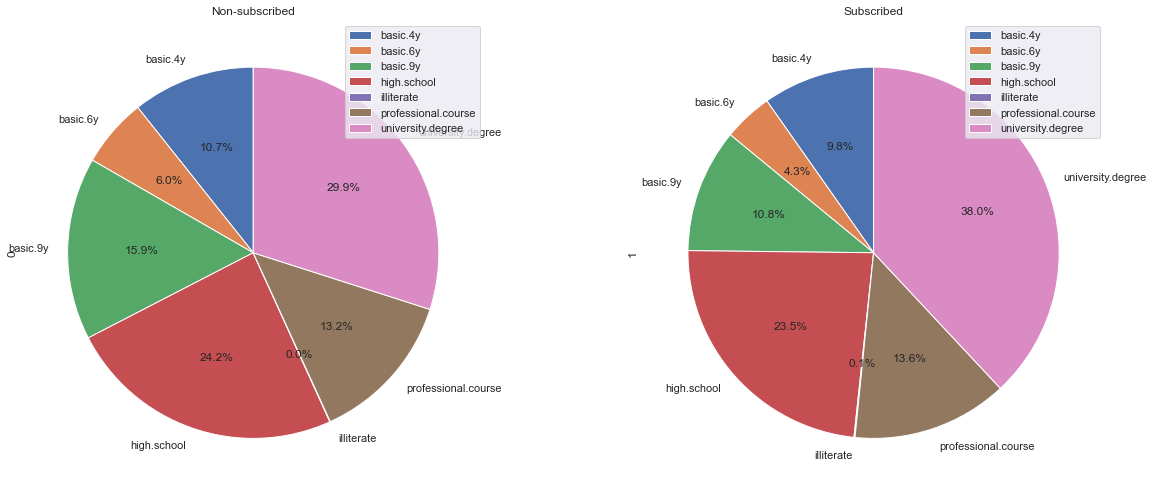

In [57]:
categories_pie_plot(df, 'education', 'y', 'conversion')

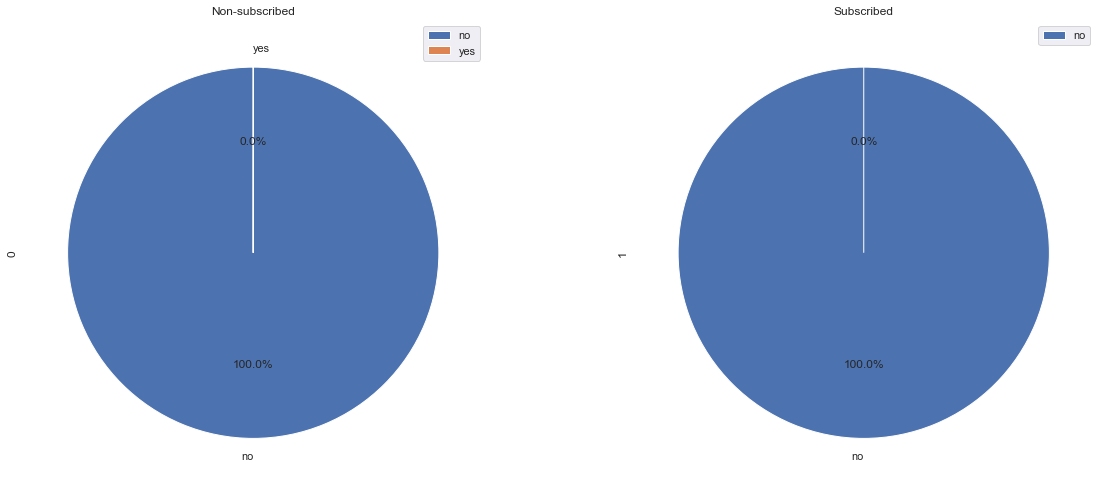

In [58]:
categories_pie_plot(df, 'default', 'y', 'conversion')
# những khách hàng đang mang nợ thường không có  nhu cầu subscribe dịch vụ

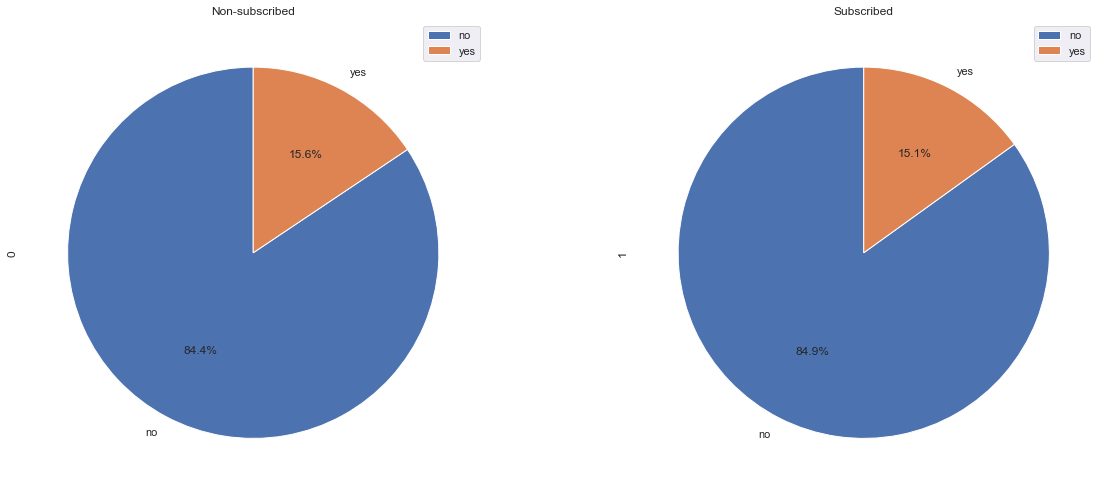

In [59]:
categories_pie_plot(df, 'loan', 'y', 'conversion')

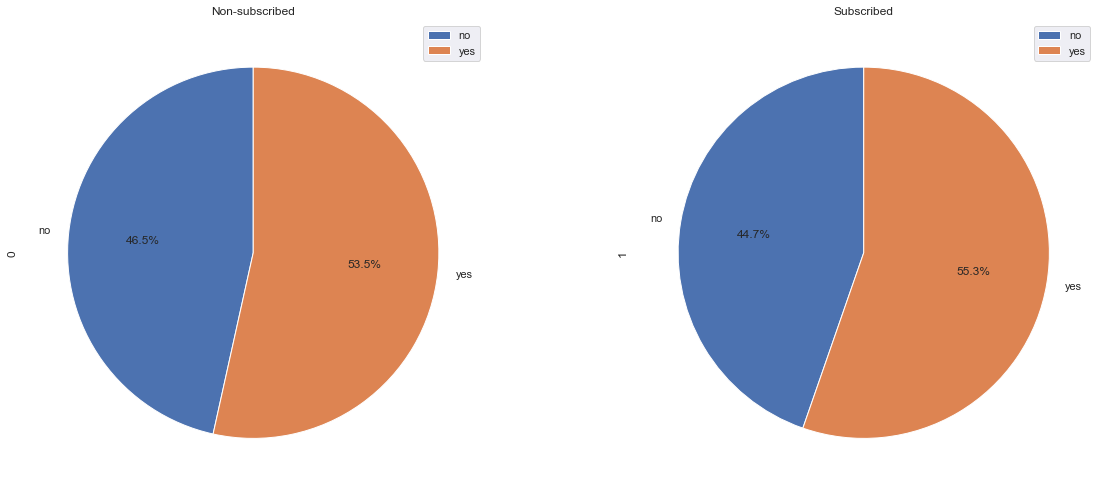

In [60]:
categories_pie_plot(df, 'housing', 'y', 'conversion')

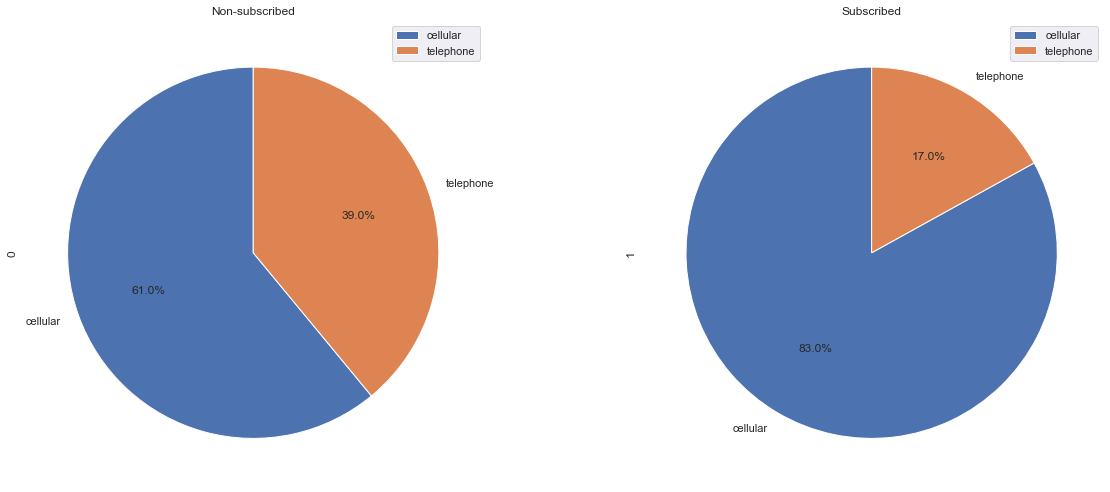

In [61]:
categories_pie_plot(df, 'contact', 'y', 'conversion')

In [79]:
pivot_df = pd.pivot_table(df, values= 'conversion', index= 'month', columns= 'y', aggfunc='count')
pivot_df.div(pivot_df.sum(axis=1),axis=0)

y,no,yes
month,,
apr,0.795135,0.204865
aug,0.893944,0.106056
dec,0.510989,0.489011
jul,0.909611,0.090389
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935643,0.064357
nov,0.898537,0.101463
oct,0.560669,0.439331


[Text(0.5, 1.0, 'Subscribed')]

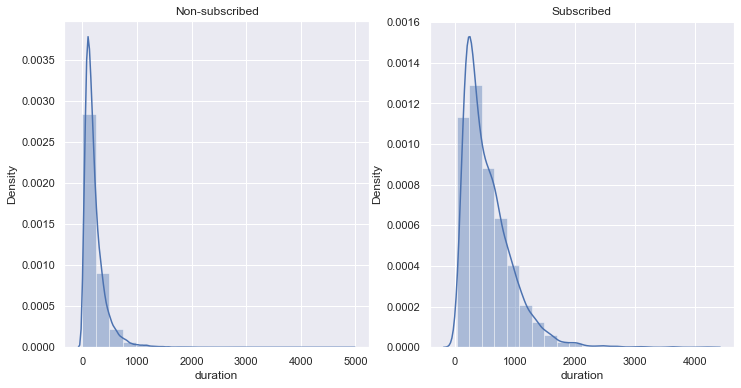

In [63]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.distplot(df[df['conversion'] == 0]['duration'], ax= ax[0], bins= 20).set(title = "Non-subscribed")
sns.distplot(df[df['conversion'] == 1]['duration'], ax= ax[1], bins= 20).set(title = "Subscribed")
# những người subscribe dịch vụ thường là những khách hàng có các khoản vay dài hạn

[Text(0.5, 1.0, 'Subscribed')]

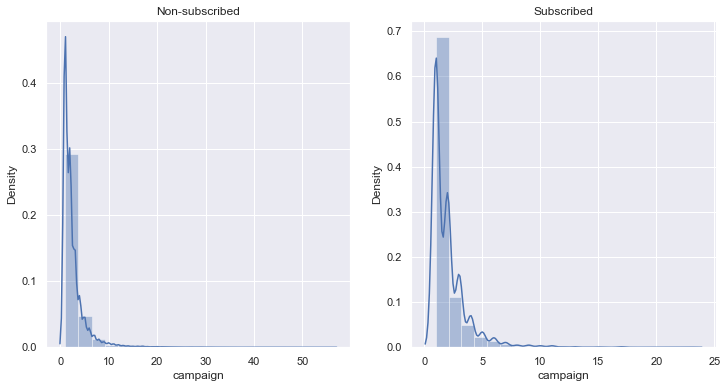

In [64]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.distplot(df[df['conversion'] == 0]['campaign'], ax= ax[0], bins= 20).set(title = "Non-subscribed")
sns.distplot(df[df['conversion'] == 1]['campaign'], ax= ax[1], bins= 20).set(title = "Subscribed")

In [65]:
df.groupby(['campaign'])['conversion'].value_counts(normalize= True)

campaign  conversion
1         0             0.869627
          1             0.130373
2         0             0.885409
          1             0.114591
3         0             0.892509
          1             0.107491
4         0             0.906038
          1             0.093962
5         0             0.924953
          1             0.075047
6         0             0.923391
          1             0.076609
7         0             0.939587
          1             0.060413
8         0             0.957500
          1             0.042500
9         0             0.939929
          1             0.060071
10        0             0.946667
          1             0.053333
11        0             0.932203
          1             0.067797
12        0             0.976000
          1             0.024000
13        0             0.956522
          1             0.043478
14        0             0.985507
          1             0.014493
15        0             0.960784
          1           

In [66]:
df.groupby(['pdays'])['conversion'].value_counts(normalize= True)
# tỉ lệ khách hàng sẽ từ chối subscribe dịch vụ tăng cao khách hàng là khách hàng bị bỏ quên
# tỉ lệ subscribe dịch vụ cao khi khách hàng là người đã sử dụng bất cứ dịch vụ tại bank trong 30 ngày gần nhất

pdays  conversion
0      1             0.666667
       0             0.333333
1      0             0.692308
       1             0.307692
2      1             0.606557
       0             0.393443
3      1             0.678815
       0             0.321185
4      1             0.533898
       0             0.466102
5      1             0.630435
       0             0.369565
6      1             0.701456
       0             0.298544
7      1             0.666667
       0             0.333333
8      1             0.666667
       0             0.333333
9      1             0.546875
       0             0.453125
10     1             0.576923
       0             0.423077
11     1             0.535714
       0             0.464286
12     0             0.551724
       1             0.448276
13     1             0.777778
       0             0.222222
14     1             0.550000
       0             0.450000
15     1             0.666667
       0             0.333333
16     1             0

[Text(0.5, 1.0, 'Subscribed')]

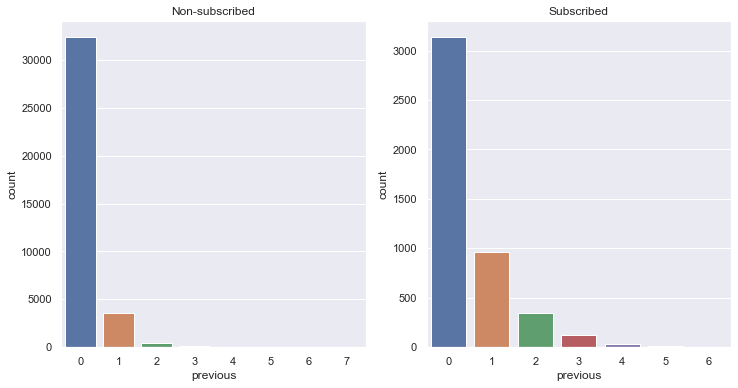

In [67]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.countplot(df[df['conversion'] == 0]['previous'], ax= ax[0]).set(title = "Non-subscribed")
sns.countplot(df[df['conversion'] == 1]['previous'], ax= ax[1]).set(title = "Subscribed")

In [68]:
df.groupby(['previous'])['conversion'].value_counts(normalize= True)
# những khách hàng có nhiều contract thì sẽ hứng thú với các dịch vụ subscribe hơn

previous  conversion
0         0             0.911676
          1             0.088324
1         0             0.787985
          1             0.212015
2         0             0.535809
          1             0.464191
3         1             0.592593
          0             0.407407
4         1             0.542857
          0             0.457143
5         1             0.722222
          0             0.277778
6         1             0.600000
          0             0.400000
7         0             1.000000
Name: conversion, dtype: float64

[Text(0.5, 1.0, 'Subscribed')]

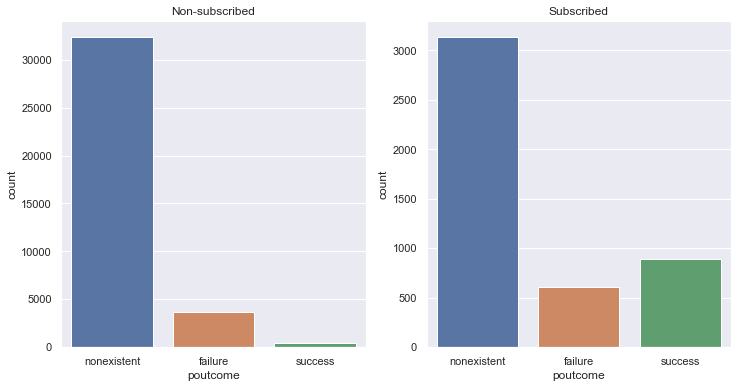

In [69]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.countplot(df[df['conversion'] == 0]['poutcome'], ax= ax[0]).set(title = "Non-subscribed")
sns.countplot(df[df['conversion'] == 1]['poutcome'], ax= ax[1]).set(title = "Subscribed")
# những người có quá khứ đã từng subscribe 1 dịch vụ nào đó sẽ có xu hướng sử dụng các dịch vụ tiếp theo

In [70]:
df['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [71]:
df.groupby(['month', 'emp.var.rate'])['emp.var.rate'].count()

month  emp.var.rate
apr    -1.8            2631
aug    -2.9             770
       -1.7             233
        1.4            5173
dec    -3.0             172
       -0.2              10
jul    -2.9             177
       -1.7             311
        1.4            6681
jun    -2.9             715
       -1.7             229
        1.4            4374
mar    -1.8             546
may    -1.8            6005
        1.1            7762
nov    -3.4             357
       -1.1             128
       -0.1            3615
oct    -3.4             446
       -1.1             204
       -0.1              67
sep    -3.4             267
       -1.1             303
Name: emp.var.rate, dtype: int64

In [72]:
df['cons.price.idx'].value_counts(normalize= True)

93.994    0.188508
93.918    0.162255
92.893    0.140689
93.444    0.125631
94.465    0.106227
93.200    0.087794
93.075    0.059671
92.201    0.018700
92.963    0.017364
92.431    0.010832
92.649    0.008670
94.215    0.007553
94.199    0.007359
92.843    0.006849
92.379    0.006484
93.369    0.006412
94.027    0.005659
94.055    0.005561
93.876    0.005149
94.601    0.004954
92.469    0.004299
93.749    0.004226
92.713    0.004177
94.767    0.003109
93.798    0.001627
92.756    0.000243
Name: cons.price.idx, dtype: float64

In [73]:
df['cons.conf.idx'].value_counts(normalize= True)

-36.4    0.188508
-42.7    0.162255
-46.2    0.140689
-36.1    0.125631
-41.8    0.106227
-42.0    0.087794
-47.1    0.059671
-31.4    0.018700
-40.8    0.017364
-26.9    0.010832
-30.1    0.008670
-40.3    0.007553
-37.5    0.007359
-50.0    0.006849
-29.8    0.006484
-34.8    0.006412
-38.3    0.005659
-39.8    0.005561
-40.0    0.005149
-49.5    0.004954
-33.6    0.004299
-34.6    0.004226
-33.0    0.004177
-50.8    0.003109
-40.4    0.001627
-45.9    0.000243
Name: cons.conf.idx, dtype: float64

In [74]:
df['euribor3m'].value_counts(normalize= True)

4.857    0.069652
4.962    0.063411
4.963    0.060399
4.961    0.046192
4.856    0.029386
           ...   
3.853    0.000024
3.901    0.000024
0.969    0.000024
0.956    0.000024
3.669    0.000024
Name: euribor3m, Length: 316, dtype: float64

In [75]:
df['nr.employed'].value_counts(normalize= True)

5228.1    0.394113
5099.1    0.207208
5191.0    0.188508
5195.8    0.089421
5076.2    0.040363
5017.5    0.025986
4991.6    0.018773
5008.7    0.015786
4963.6    0.015422
5023.5    0.004177
5176.3    0.000243
Name: nr.employed, dtype: float64

In [76]:
# conversion rate
conversions_rate_by_age = df.groupby('age')['conversion'].sum() / df.groupby('age')['conversion'].count() * 100
conversions_rate_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

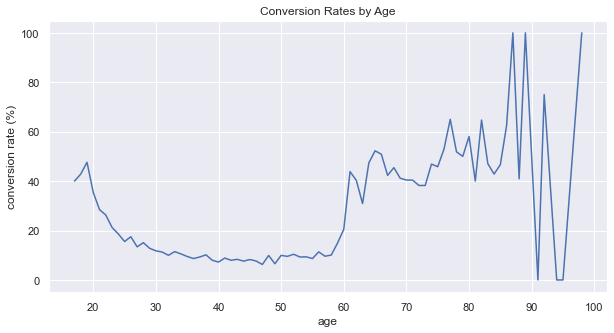

In [82]:
fig, ax = plt.subplots(figsize=(10,4))
conversions_rate_by_age.plot(kind='line',figsize=[10,5])
ax.set_title('Conversion Rates by Age')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [83]:
df['age_range'] = pd.cut(df['age'], bins=[0, 17, 24, 40, 60, 100])
df['age_range'].value_counts()

(24, 40]     22694
(40, 60]     16506
(17, 24]      1062
(60, 100]      909
(0, 17]          5
Name: age_range, dtype: int64

<AxesSubplot:ylabel='age_range'>

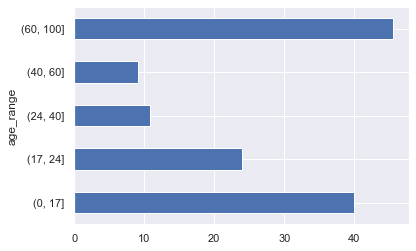

In [84]:
conversion_rate_age_range = df.groupby('age_range')['conversion'].sum() / df.groupby('age_range')['conversion'].count() * 100
conversion_rate_age_range.plot(kind= 'barh')

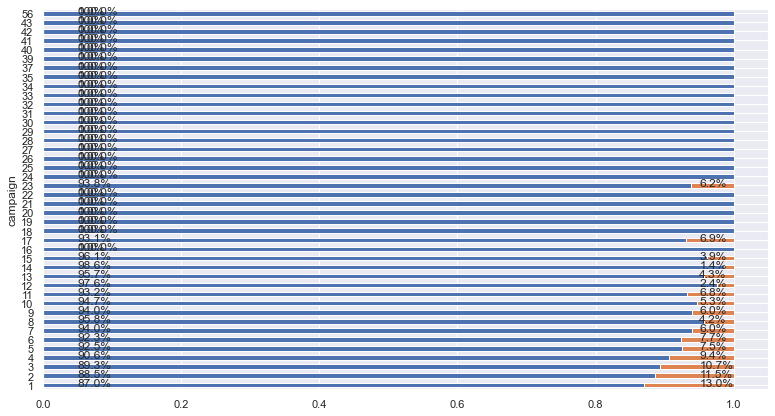

In [87]:
stacked_hbar_chart(df, 'campaign', 'y', 'conversion')

In [88]:
df['campaign_T'] = df['campaign'].apply(lambda x: '7+' if x>=7 else x)
df['campaign_T'] = pd.cut(df['campaign'],bins=[0,1,2,3,4,5,6,40],labels = ['1','2','3','4','5','6','7+'])
df['campaign_T'].value_counts()

1     17634
2     10568
3      5340
4      2650
7+     2400
5      1599
6       979
Name: campaign_T, dtype: int64

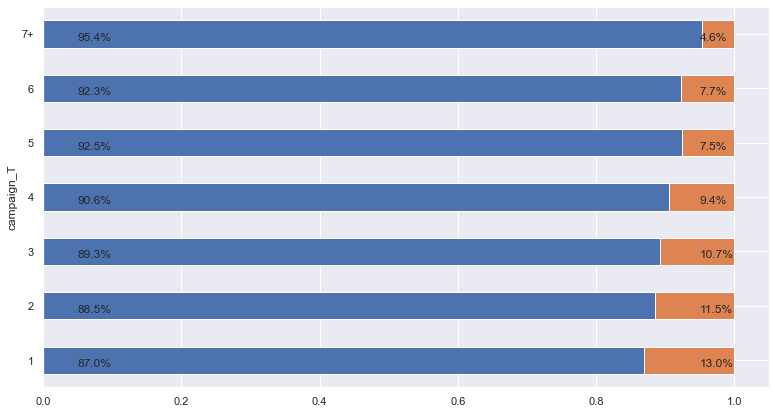

In [89]:
stacked_hbar_chart(df, 'campaign_T', 'y', 'conversion')

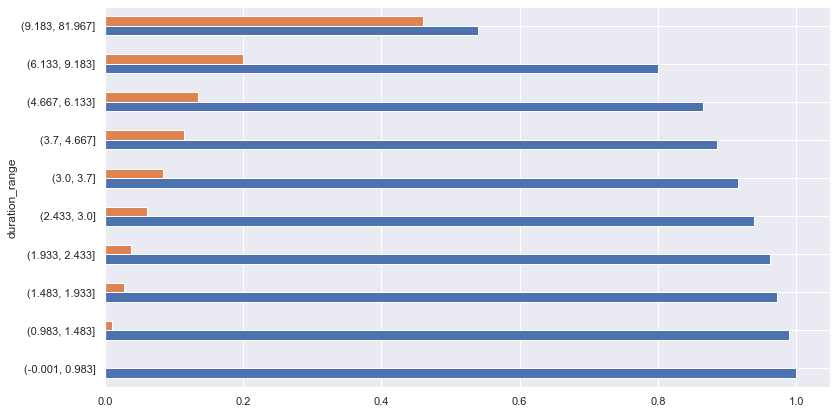

In [93]:
df['duration_range'] = pd.qcut(df['duration']/60,10)


pivot_df = pd.pivot_table(df, values='y', index='duration_range', columns= 'conversion', aggfunc=len)
ax = pivot_df.div(pivot_df.sum(axis=1),axis=0).plot(kind='barh',figsize=(13,7))
ax.get_legend().remove()
